In [1]:
from vif.utils.detection_utils import get_segmentation_masks
from vif.utils.image_utils import plot_segmentation_masks
from vif.utils.renderer.tex_renderer import TexRenderer
from PIL import Image
from google import genai
from google.genai import types as genTypes
import os
# APIs used
gclient = genai.Client(
    api_key=os.environ.get("GOOGLE_API_KEY"),
    http_options=genTypes.HttpOptions(api_version="v1alpha"),
)

# Models used
temperature=0.3,
visual_model="gemini-2.5-flash"

2025-08-28 11:25:47.059 | INFO     | vif.utils.caching:instantiate_cache:26 - seg_cache cache loaded


### With code rendering

In [7]:
renderer = TexRenderer()

code = open("notebooks/protos/code/rpgb_rtc.tex").read()

stcg = renderer.from_string_to_image(code)
stcg.save("tests/resources/seg/rgbp_stc.png")

2025-08-27 16:06:54.290 | DEBUG    | vif.utils.renderer.tex_renderer:from_string_to_image:45 - latex renderer writing to /home/creux/.cache/varbench/df0643e1-df2b-4fc0-931b-37c99b46ba17.tex
2025-08-27 16:06:54.613 | DEBUG    | vif.utils.renderer.tex_renderer:from_string_to_image:78 - converting /home/creux/.cache/varbench/df0643e1-df2b-4fc0-931b-37c99b46ba17.tex to png


In [8]:
d = get_segmentation_masks(stcg,gclient,["circle","square","triangle"],visual_model)[0]

2025-08-27 16:08:37.305 | WARNING  | vif.utils.caching:checkForCached:45 - Cache hit


In [9]:
import pickle

with open("tests/resources/seg/rgbp_stc.pickle","wb") as square_blurple_file:
    pickle.dump(d,square_blurple_file)

### With image path directly

2025-08-28 11:25:49.477 | INFO     | vif.utils.detection_utils:get_segmentation_masks:92 - Getting masks for features : black node at the bottom left outside and on the left side of the red zone
2025-08-28 11:25:50.735 | INFO     | vif.utils.detection_utils:get_segmentation_masks:123 - LLM segmentation response: ```json
[
  {"box_2d": [492, 157, 549, 214], "mask": "", "label": "black node at the bottom left outside and on the left side of the red zone"}
]
```
2025-08-28 11:25:50.736 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:184 - Segmentation worked.
2025-08-28 11:25:50.736 | INFO     | vif.utils.caching:checkForCached:42 - new cache
2025-08-28 11:25:50.737 | INFO     | vif.utils.caching:checkForCached:43 - {'b44064d3c020e06b4d665c2b007f5704d59e9dbd': ([SegmentationMask(y0=147, x0=47, y1=164, x1=64, mask=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ...,
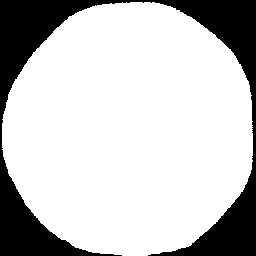

In [2]:
colnodes = Image.open("/home/creux/Downloads/godamn.png")
colnode_seg = get_segmentation_masks(
    colnodes,
    gclient,
    ["black node at the bottom left outside and on the left side of the red zone"],
    visual_model,
)[0]

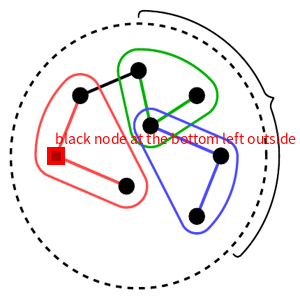

In [3]:
plot_segmentation_masks(colnodes,colnode_seg)

In [ ]:
#;) response.candidates[0].logprobs_result.chosen_candidates[0]